<a href="https://colab.research.google.com/github/Radhika02-rjn/Radhika02-rjn/blob/main/Diabetes_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Evaluation:
Accuracy: 75.97%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[83 16]
 [21 34]]


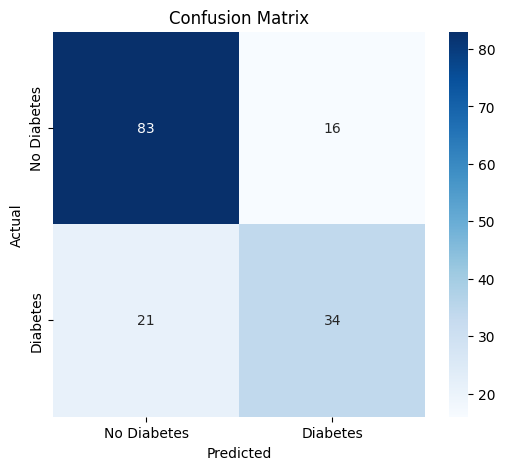


Feature Importance:
                     Feature  Importance
1                   Glucose    0.597370
5                       BMI    0.262156
7                       Age    0.140474
0               Pregnancies    0.000000
3             SkinThickness    0.000000
2             BloodPressure    0.000000
4                   Insulin    0.000000
6  DiabetesPedigreeFunction    0.000000


<ipython-input-6-1eb22ea98bd0>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


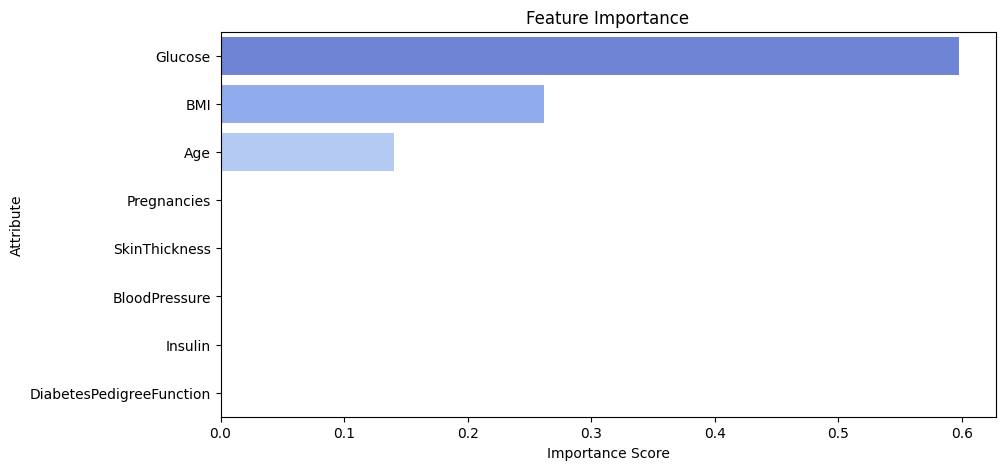

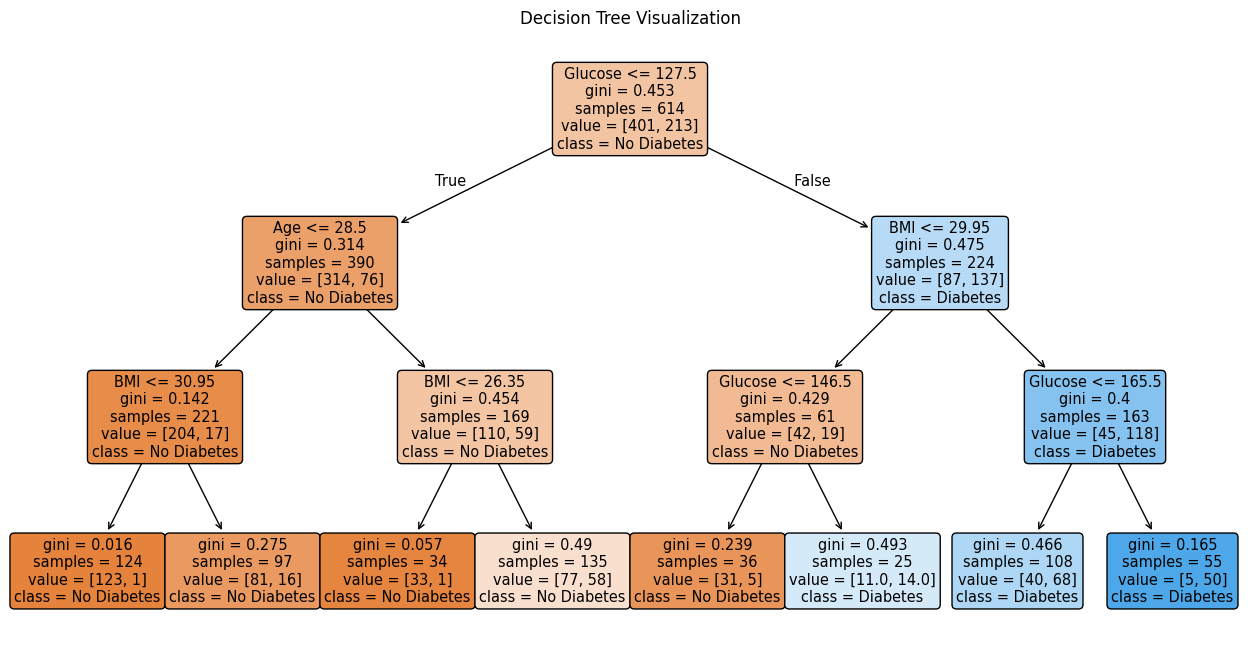

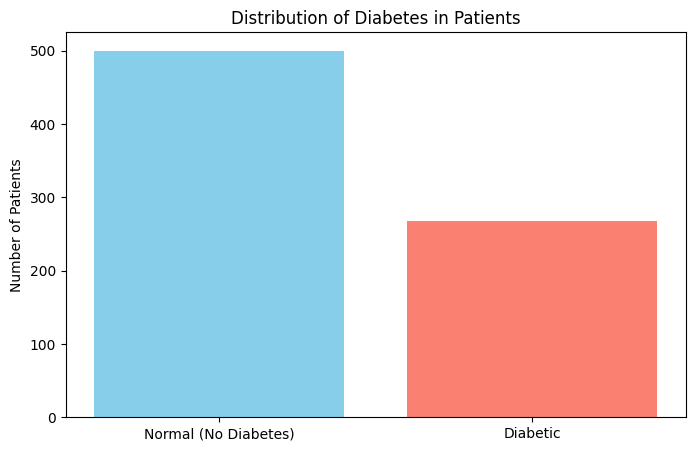


Patient Prediction Explanation:

Patient Data:
Pregnancies                   4.000
Glucose                     154.000
BloodPressure                72.000
SkinThickness                29.000
Insulin                     126.000
BMI                          31.300
DiabetesPedigreeFunction      0.338
Age                          37.000
Name: 568, dtype: float64
Prediction: You may be at high risk of diabetes.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [6]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

#  Load the dataset
df = pd.read_csv("/content/diabetes_dataset.csv")

#  Separate features and target
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

#  Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  Build the decision tree using default Gini criterion
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

#  Make predictions
y_pred = model.predict(x_test)

#  Evaluate the model
print("\nModel Evaluation:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

#  Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#  Feature Importance
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

#  Visualize Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Attribute")
plt.show()

#  Visualize the decision tree
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=x.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#  Show Normal vs Diabetic Graph
plt.figure(figsize=(8, 5))
labels = ['Normal (No Diabetes)', 'Diabetic']
colors = ['skyblue', 'salmon']
values = df['Outcome'].value_counts().sort_index()
plt.bar(labels, values, color=colors)
plt.title("Distribution of Diabetes in Patients")
plt.ylabel("Number of Patients")
plt.show()

#  Explain prediction for a single patient
print("\nPatient Prediction Explanation:")
for index in range(len(x_test)):
    if y_pred[index] == 1:
        patient_data = x_test.iloc[index]
        break

print("\nPatient Data:")
print(patient_data)

if model.predict([patient_data])[0] == 1:
    print("Prediction: You may be at high risk of diabetes.")
else:
    print("Prediction: You are normal.")
